In [444]:
# 1vs1 match functions
def winner_civ(player, dict_civ):
    if player[0]['won'] == True:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def loser_civ(player, dict_civ):
    if player[0]['won'] == False:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def get_average_rating (rat1, rat2):
    if rat1 == None or rat2 == None:
        if rat1 != None:
            return rat1
        if rat2 != None:
            return rat2
        
        return None
    else:
        return (rat1 + rat2)/2

# team match functions
def get_winner_team_number(players):
    for player in players:
        if player['won'] == True:
            return player['team']

def winner_civ_team(players, dict_civ, position):
    list_pos=[]
    for player in players:
        if player['won'] == True:
            t = (player['color'], player['civ'])
            list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def loser_civ_team(players, dict_civ, position):
    list_pos=[]
    winner_number=get_winner_team_number(players)
    for player in players:
        if player['won'] == False:
            if player['team'] != winner_number:
                t = (player['color'], player['civ'])
                list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def get_average_rating_team(players):
    rat_sum=0
    divider=0
    num_players=len(players)
    for player in players:
        if player['rating'] != None:
            rat_sum += player['rating']
            divider += 1
            
    if (divider < (num_players/2)):
        return None
    else:
        return (rat_sum/divider)
    
    
#returns "outlierless" values(this function proved itself not be benefical for the resulting data, therefore it won't be used)
def remove_outlier_zscore(plt_df, col):
    from numpy import log10
    pltLog = log10(plt_df[col])
    mad = abs(pltLog - (pltLog.median())).median()*(1/0.6745)
    return plt_df[abs(plt_dflog - plt_dflog.mean())/mad > 2.5]

In [445]:
has_relevant_water = {
            "Arabia": False,
            "Archipelago": True,
            "Baltic": True,
            "Black Forest": False,
            "Coastal": True,
            "Continental": True,
            "Crater Lake": True,
            "Fortress": False,
            "Gold Rush": False,
            "Highland": True,
            "Islands": False,
            "Mediterranean": False,
            "Migration": False,
            "Rivers": False,
            "Team Islands": False,
            "Full Random": True,
            "Scandinavia": True,
            "Mongolia": False,
            "Yucatan": False,
            "Salt Marsh": True,
            "Arena": False,
            "Oasis": True,
            "Ghost Lake": False,
            "Nomad": True,
            "Iberia": True,
            "Britain": True,
            "Mideast": True,
            "Texas": True,
            "Italy": True,
            "Central America": True,
            "France": True,
            "Norse Lands": True,
            "Sea of Japan (East Sea)": True,
            "Byzantium": True,
            "Custom": True,
            "Random Land Map": False,
            "Random Real World Map": True,
            "Blind Random": True,
            "Random Special Map": True,
            "Acropolis": False,
            "Budapest": True,
            "Cenotes": True,
            "City of Lakes": True,
            "Golden Pit": False,
            "Hideout": False,
            "Hill Fort": False,
            "Lombardia": False,
            "Steppe": False,
            "Valley": False,
            "MegaRandom": True,
            "Hamburger": True,
            "CtR Random": True,
            "CtR Monsoon": False,
            "CtR Pyramid Descent": False,
            "CtR Spiral": False,
            "Kilimanjaro": False,
            "Mountain Pass": False,
            "Nile Delta": True,
            "Serengeti": False,
            "Socotra": False,
            "Amazon": True,
            "China": True,
            "Horn of Africa": True,
            "India": True,
            "Madagascar": True,
            "West Africa": True,
            "Bohemia": False,
            "Earth": True,
            "Canyons": False,
            "Enemy Archipelago": True,
            "Enemy Islands": True,
            "Far Out": False,
            "Front Line": False,
            "Inner Circle": False,
            "Motherland": True,
            "Open Plains": False,
            "Ring of Water": True,
            "Snakepit": True,
            "The Eye": True,
            "Australia": True,
            "Indochina": True,
            "Indonesia": True,
            "Strait of Malacca": True,
            "Philippines": True,
            "Bog Islands": True,
            "Mangrove Jungle": True,
            "Pacific Islands": True,
            "Sandbank": False,
            "Water Nomad": True,
            "Jungle Islands": True,
            "Holy Line": False,
            "Border Stones": False,
            "Yin Yang": True,
            "Jungle Lanes": False,
            "Alpine Lakes": False,
            "Bogland": False,
            "Mountain Ridge": False,
            "Ravines": False,
            "Wolf Hill": False,
            "Antarctica": True,
            "Custom Map Pool": True,
            "Golden Swamp": True,
            "Four Lakes": True,
            "Land Nomad": False
            }
import requests

url="https://aoe2.net/api/strings?game=aoe2de&language=en"
req=requests.get(url)
dict_file=json.loads(req.content)

civ_dict={}
for civ in dict_file['civ']:
    civ_dict[civ['id']]=civ['string']

map_dict={}
for map_t in dict_file['map_type']:
    map_dict[map_t['id']]=map_t['string']

In [446]:
import pandas
import json
from IPython.display import display

df=pandas.read_json('matches_dataset_filtered.json', dtype={'match_id': int, 'match_uuid': 'string', 'num_players': int,
                                                        'map_type' : int, 'rating_type': int,'visibility' : int,
                                                        'players' : [dict]})
pandas.options.display.max_columns = None

In [447]:
df['has_relevant_water']=[has_relevant_water[map_dict[value]] for value in df['map_type']]

In [448]:
df_x1=df[df['rating_type'] == 2]
df_team=df[df['rating_type'] == 4]

df_x1=df_x1.drop('rating_type', 1)
df_team=df_team.drop('rating_type', 1)

In [449]:
df_x1['wCiv']=[winner_civ(player, civ_dict) for player in df_x1['players']]

df_x1['lCiv']=[loser_civ(player, civ_dict) for player in df_x1['players']]

df_x1['average_rating']=[get_average_rating(player[0]['rating'], player[1]['rating']) for player in df_x1['players']]

In [450]:
df_team['wCiv1']=[winner_civ_team(player, civ_dict, 1) for player in df_team['players']]
df_team['wCiv2']=[winner_civ_team(player, civ_dict, 2) for player in df_team['players']]
df_team['wCiv3']=[winner_civ_team(player, civ_dict, 3) for player in df_team['players']]
df_team['wCiv4']=[winner_civ_team(player, civ_dict, 4) for player in df_team['players']]

df_team['lCiv1']=[loser_civ_team(player, civ_dict, 1) for player in df_team['players']]
df_team['lCiv2']=[loser_civ_team(player, civ_dict, 2) for player in df_team['players']]
df_team['lCiv3']=[loser_civ_team(player, civ_dict, 3) for player in df_team['players']]
df_team['lCiv4']=[loser_civ_team(player, civ_dict, 4) for player in df_team['players']]

df_team['average_rating']=[get_average_rating_team(players) for players in df_team['players']]

In [451]:
df_team

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating
3,125,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,58.133333,False,Franks,Huns,None,None,Franks,Khmer,None,None,1439.500
5,9,40745180,0a591dc0-7ab5-8b45-9da9-87d287fa4827,4,"[{'civ': 9, 'clan': None, 'color': 2, 'country...",0,28.466667,False,Franks,Mayans,None,None,Ethiopians,Franks,None,None,1494.000
6,9,40745166,a8c826b9-a658-ed4f-a1cd-58cd8a261506,6,"[{'civ': 8, 'clan': None, 'color': 2, 'country...",0,33.700000,False,Ethiopians,Indians,Franks,None,Cumans,Slavs,Huns,None,1472.500
7,19,40745162,2fde7cf3-239b-de41-8d1f-9a623444ccd2,6,"[{'civ': 21, 'clan': None, 'color': 6, 'countr...",0,37.583333,False,Italians,Malians,Persians,None,Koreans,Vikings,Malay,None,NaN
22,71,40745240,69965a43-38dc-ad48-935f-9bbbadac46cb,4,"[{'civ': 23, 'clan': None, 'color': 4, 'countr...",0,22.733333,False,Franks,Lithuanians,None,None,Celts,Mayans,None,None,2184.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59970,74,42259053,1d0f3d91-4c45-4649-95df-651136619255,4,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,49.716667,False,Franks,Huns,None,None,Goths,Ethiopians,None,None,1063.250
59974,9,42259180,af4c92b1-9321-2e4a-8c13-cf825c7a6108,4,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,29.816667,False,Slavs,Vietnamese,None,None,Vikings,Franks,None,None,1153.000
59980,9,42259099,c22467be-c624-e349-9779-549f77848fdc,8,"[{'civ': 29, 'clan': None, 'color': 4, 'countr...",0,38.216667,False,Saracens,Lithuanians,Aztecs,Franks,Khmer,Spanish,Japanese,Mongols,1624.000
59990,29,42259160,711b0658-7607-7f4f-8155-dbcc7075d238,8,"[{'civ': 20, 'clan': None, 'color': 4, 'countr...",0,63.683333,False,Persians,Magyars,Franks,Aztecs,Britons,Goths,Malians,Spanish,1280.625


In [452]:
df_x1

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,31.483333,False,Byzantines,Magyars,1234.0
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,20.733333,False,Incas,Britons,1111.0
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,22.983333,False,Ethiopians,Mayans,1202.5
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,48.150000,False,Mayans,Franks,1453.0
15,9,40745311,f577c0f8-0d34-9143-80b8-c5726eee3800,2,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",0,0.150000,False,Spanish,Persians,NaN
...,...,...,...,...,...,...,...,...,...,...,...
59985,9,42259167,3e33efe4-02c4-c34f-b47c-f5097b2eae19,2,"[{'civ': 7, 'clan': None, 'color': 2, 'country...",0,31.583333,False,Chinese,Chinese,1692.5
59988,9,42259216,fbf6ea6a-08ff-d746-8403-f4f45d932b15,2,"[{'civ': 13, 'clan': None, 'color': 2, 'countr...",0,41.433333,False,Byzantines,Incas,926.5
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,21.733333,False,Franks,Mongols,1103.0
59996,87,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,31.916667,False,Franks,Goths,1297.5


In [453]:
df_x1.to_json('x1_matches_dataset.json')

df_team.to_json('team_matches_dataset.json')

In [454]:
df_x1.dtypes

map_type                int32
match_id                int32
match_uuid             object
num_players             int32
players                object
visibility              int32
duration              float64
has_relevant_water       bool
wCiv                   object
lCiv                   object
average_rating        float64
dtype: object

In [455]:
df_team.dtypes

map_type                int32
match_id                int32
match_uuid             object
num_players             int32
players                object
visibility              int32
duration              float64
has_relevant_water       bool
wCiv1                  object
wCiv2                  object
wCiv3                  object
wCiv4                  object
lCiv1                  object
lCiv2                  object
lCiv3                  object
lCiv4                  object
average_rating        float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x27c8b4733a0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ca1855400>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c8b473700>],
 'medians': [<matplotlib.lines.Line2D at 0x27c8cf14a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c8cf14790>],
 'means': []}

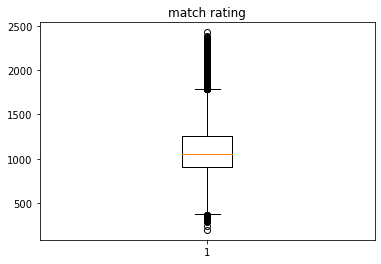

In [456]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('match rating')

#remoção de ratings com valores NaN(partidas em que nenhum jogador possuia rank)
plt_df = df_x1[df_x1['average_rating'] > 0]
ax1.boxplot(plt_df['average_rating'])

In [457]:
plt_df['average_rating']

0        1234.0
1        1111.0
2        1202.5
4        1453.0
16       1167.0
          ...  
59985    1692.5
59988     926.5
59989    1103.0
59996    1297.5
59999    1049.0
Name: average_rating, Length: 22103, dtype: float64

In [458]:
import numpy as np
xi_mean = np.mean(plt_df['average_rating'])
xi_sd = np.std(plt_df['average_rating'], ddof = 1)
z_score = (plt_df['average_rating'] - xi_mean)/xi_sd

In [459]:
xi_median = np.median(plt_df['average_rating'])
MAD = np.median(abs(plt_df['average_rating'] - xi_median))
Mi = 0.6745*(plt_df['average_rating'] - xi_median) / MAD

In [460]:
Mi

0        0.699916
1        0.218968
2        0.576746
4        1.556238
16       0.437936
           ...   
59985    2.492717
59988   -0.502454
59989    0.187687
59996    0.948210
59999   -0.023461
Name: average_rating, Length: 22103, dtype: float64

In [461]:
z_score

0        0.453171
1        0.026571
2        0.343920
4        1.212728
16       0.220796
           ...   
59985    2.043384
59988   -0.613329
59989   -0.001175
59996    0.673408
59999   -0.188463
Name: average_rating, Length: 22103, dtype: float64

In [462]:
df_comparison = pandas.DataFrame({'Xi':plt_df['average_rating'], 'Z-score':z_score, 'Modified Z-Score': Mi})
df_comparison.round(2)
cols = ['Xi','Z-score','Modified Z-Score']
df_comparison = df_comparison[cols]
df_comparison

,Xi,Z-score,Modified Z-Score
0,1234.0,0.453171,0.699916
1,1111.0,0.026571,0.218968
2,1202.5,0.343920,0.576746
4,1453.0,1.212728,1.556238
16,1167.0,0.220796,0.437936
...,...,...,...
59985,1692.5,2.043384,2.492717
59988,926.5,-0.613329,-0.502454
59989,1103.0,-0.001175,0.187687
59996,1297.5,0.673408,0.948210


{'whiskers': [<matplotlib.lines.Line2D at 0x27c8d4422e0>,
 'caps': [<matplotlib.lines.Line2D at 0x27c8d442610>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c8d442970>],
 'medians': [<matplotlib.lines.Line2D at 0x27c8d447670>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c8d4d5520>],
 'means': []}

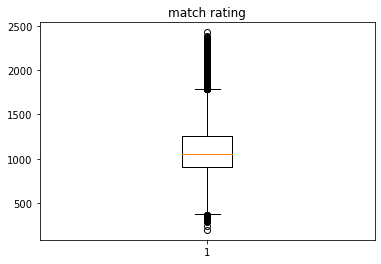

In [463]:
fig1, ax1 = plt.subplots()
ax1.set_title('match rating')
ax1.boxplot(df_comparison['Xi'])

In [464]:
df_comparison
df_comparison.sort_values('Xi')

,Xi,Z-score,Modified Z-Score
14629,195.5,-3.148651,-3.360770
55201,238.0,-3.001248,-3.194588
15161,285.0,-2.838239,-3.010812
53276,300.0,-2.786214,-2.952159
49039,300.5,-2.784480,-2.950204
...,...,...,...
11905,2368.0,4.386216,5.134020
48562,2371.0,4.396621,5.145751
32424,2376.0,4.413962,5.165301
39714,2388.5,4.457316,5.214178


In [465]:
df_x1.sort_values('average_rating')['average_rating']

14629    195.5
55201    238.0
15161    285.0
53276    300.0
49039    300.5
         ...  
58784      NaN
58811      NaN
59294      NaN
59613      NaN
59965      NaN
Name: average_rating, Length: 22225, dtype: float64

In [466]:
plt_df

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,31.483333,False,Byzantines,Magyars,1234.0
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,20.733333,False,Incas,Britons,1111.0
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,22.983333,False,Ethiopians,Mayans,1202.5
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,48.150000,False,Mayans,Franks,1453.0
16,9,40745343,3b1f86e3-85d4-7248-912b-1506c1d0f44b,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,26.983333,False,Magyars,Vikings,1167.0
...,...,...,...,...,...,...,...,...,...,...,...
59985,9,42259167,3e33efe4-02c4-c34f-b47c-f5097b2eae19,2,"[{'civ': 7, 'clan': None, 'color': 2, 'country...",0,31.583333,False,Chinese,Chinese,1692.5
59988,9,42259216,fbf6ea6a-08ff-d746-8403-f4f45d932b15,2,"[{'civ': 13, 'clan': None, 'color': 2, 'countr...",0,41.433333,False,Byzantines,Incas,926.5
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,21.733333,False,Franks,Mongols,1103.0
59996,87,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,31.916667,False,Franks,Goths,1297.5


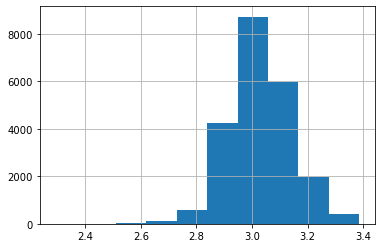

In [467]:
from numpy import log10
plt_dflog = log10(plt_df['average_rating'])
plt_dflog.hist()

In [468]:
mad = plt_dflog.mad()

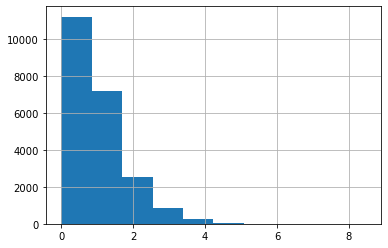

In [469]:
(abs(plt_dflog - plt_dflog.median())/mad).hist()

In [470]:
plt_df[abs(plt_dflog - plt_dflog.median())/mad > 3.5]

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
410,9,40746572,f875e8a0-66cb-da4b-a35f-1ee6b5bd9768,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,16.683333,False,Goths,Goths,2134.5
806,29,40747978,910d90d8-3852-1547-b89e-5a40b22f92bc,2,"[{'civ': 32, 'clan': None, 'color': 2, 'countr...",0,47.233333,False,Berbers,Turks,439.5
943,76,40748491,fce1f41a-7390-9044-a8ef-6416055ee50a,2,"[{'civ': 14, 'clan': None, 'color': 2, 'countr...",0,32.983333,False,Italians,Indians,390.0
1784,9,40790510,dcc378bf-8bb4-1d40-ba85-e3b24487336b,2,"[{'civ': 1, 'clan': None, 'color': 6, 'country...",0,31.000000,False,Berbers,Vietnamese,2141.0
2448,69,40821623,3402a0ea-bd90-7b45-b554-37d380366bc2,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,20.483333,True,Mayans,Vikings,442.5
...,...,...,...,...,...,...,...,...,...,...,...
59011,9,42256107,786f696a-5b37-d547-9d0d-ae241bea9353,2,"[{'civ': 6, 'clan': None, 'color': 2, 'country...",0,46.783333,False,Celts,Lithuanians,2360.5
59480,87,42257594,63d7cdb2-fbda-4643-8b0e-a641ddfb96fd,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,7.783333,False,Franks,Koreans,2246.0
59537,9,42257864,65e35164-47e7-054b-b580-83981157a7c7,2,"[{'civ': 21, 'clan': None, 'color': 6, 'countr...",0,31.983333,False,Franks,Malay,2193.0
59627,17,42258068,04c9c218-49a8-2045-9acb-6d7cf1290622,2,"[{'civ': 6, 'clan': None, 'color': 2, 'country...",0,33.500000,False,Koreans,Celts,2246.0


In [471]:
plt_df.sort_values('duration')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
55328,9,42174307,cdb740e7-4b77-5541-94d8-3dce3d765f4c,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,0.116667,False,Goths,Persians,792.0
1656,9,40790116,af55e696-f4cd-ff40-936e-ca4ae52d41d2,2,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",0,0.116667,False,Aztecs,Burmese,1662.0
31846,69,41521700,21f8bff6-fae6-844a-b4d3-0da3152d6ec8,2,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",0,0.116667,True,Indians,Spanish,1975.5
57037,85,42227042,96ed99e9-9aa3-b241-abc6-ea5b05c5b559,2,"[{'civ': 21, 'clan': None, 'color': 2, 'countr...",0,0.133333,True,Malay,Malay,827.0
51409,9,42084596,2185e0e4-eeb6-6245-86d8-0d5ea62ff0ac,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,0.133333,False,Persians,Britons,1363.0
...,...,...,...,...,...,...,...,...,...,...,...
23669,9,41309833,575f8eb4-a20d-a84d-a42c-c4a192b8d8c2,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,5798.766667,False,Aztecs,Britons,859.0
19595,9,41226251,da02ea54-8316-694a-ada9-621c092d95f1,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,5974.216667,False,Britons,Japanese,956.0
41076,9,41805945,9ee3ef49-8b8a-5142-bc26-054400b7ba41,2,"[{'civ': 32, 'clan': None, 'color': 2, 'countr...",0,6579.683333,False,Britons,Turks,952.0
56104,67,42202923,bacde957-e1a4-574b-b715-0172bca000f1,2,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",0,7252.083333,False,Cumans,Spanish,952.0


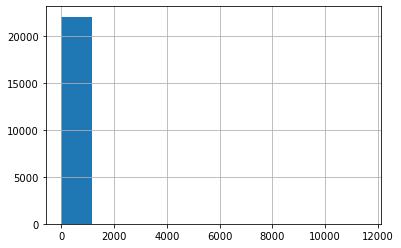

In [472]:
plt_df['duration'].hist()

In [473]:
remove_outlier_zscore(plt_df, 'duration') #ignorado

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
943,76,40748491,fce1f41a-7390-9044-a8ef-6416055ee50a,2,"[{'civ': 14, 'clan': None, 'color': 2, 'countr...",0,32.983333,False,Italians,Indians,390.0
3120,29,40844924,f89e8399-31b3-3047-acfd-01dfb695f0e5,2,"[{'civ': 16, 'clan': None, 'color': 2, 'countr...",0,7.216667,False,Britons,Japanese,374.0
3267,67,40845451,e2d3c23a-e69a-6e46-9713-6ec8fb262b75,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,66.483333,False,Britons,Vikings,324.5
4038,9,40857520,418fad43-c328-854a-9f76-0cc4c8ae5597,2,"[{'civ': 5, 'clan': None, 'color': 2, 'country...",0,19.666667,False,Goths,Byzantines,369.0
6588,69,40900651,060b01bc-cc63-b44f-9f5f-c822d59bfd8f,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,26.666667,True,Britons,Byzantines,354.0
9937,29,40992084,bbe1e1df-58d9-e241-b13c-8873ec3d755a,2,"[{'civ': 32, 'clan': None, 'color': 2, 'countr...",0,52.733333,False,Turks,Goths,349.5
10783,29,41004676,05d63601-82ae-e543-a8ac-8b894180481f,2,"[{'civ': 6, 'clan': None, 'color': 2, 'country...",0,30.783333,False,Mayans,Celts,414.5
14314,69,41111005,78297f86-2215-7f48-8907-455f2c20be77,2,"[{'civ': 17, 'clan': None, 'color': 2, 'countr...",0,11.616667,True,Khmer,Khmer,364.5
14629,23,41111949,0662872f-a4b8-d94d-807b-4c362feaeda2,2,"[{'civ': 31, 'clan': None, 'color': 2, 'countr...",0,13.566667,False,Teutons,Vikings,195.5
15028,139,41133843,475a95a7-08c3-554c-b8e9-9131d35156b7,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,41.616667,True,Mongols,Vikings,338.5


In [474]:
df_x1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
31846,69,41521700,21f8bff6-fae6-844a-b4d3-0da3152d6ec8,2,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",0,0.116667,True,Indians,Spanish,1975.5
55328,9,42174307,cdb740e7-4b77-5541-94d8-3dce3d765f4c,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,0.116667,False,Goths,Persians,792.0
1656,9,40790116,af55e696-f4cd-ff40-936e-ca4ae52d41d2,2,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",0,0.116667,False,Aztecs,Burmese,1662.0
1820,23,40790671,55ff8217-7f0e-504a-9fc4-bb429af301ad,2,"[{'civ': 15, 'clan': None, 'color': 2, 'countr...",0,0.133333,False,Italians,Spanish,NaN
57037,85,42227042,96ed99e9-9aa3-b241-abc6-ea5b05c5b559,2,"[{'civ': 21, 'clan': None, 'color': 2, 'countr...",0,0.133333,True,Malay,Malay,827.0
...,...,...,...,...,...,...,...,...,...,...,...
48142,76,41995192,0a1b31db-8d9e-e74f-822f-e326f774a242,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,7473.550000,False,Cumans,Britons,NaN
35106,29,41624051,f7236dfc-9885-6740-9f07-9bb3145dbf5c,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,7810.016667,False,Britons,Lithuanians,NaN
52897,9,42099143,7d06c5f6-81c6-4044-8a4a-c063c32ba39a,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,11344.333333,False,Celts,Persians,NaN
18655,9,41191105,9c4c040e-15a2-a846-9718-89242f10db36,2,"[{'civ': 9, 'clan': None, 'color': 2, 'country...",0,11530.383333,False,Spanish,Ethiopians,958.0


In [475]:
pltLog = log10(plt_df['duration'])
q1 = pltLog.quantile(q=0.25)
q3 = pltLog.quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.21897505093859326


In [476]:
a1 = plt_df[pltLog < (q1-1.5*iqr)]

In [477]:
a2 = plt_df[pltLog > (q3+1.5*iqr)]

In [478]:
a1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
55328,9,42174307,cdb740e7-4b77-5541-94d8-3dce3d765f4c,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,0.116667,False,Goths,Persians,792.0
31846,69,41521700,21f8bff6-fae6-844a-b4d3-0da3152d6ec8,2,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",0,0.116667,True,Indians,Spanish,1975.5
1656,9,40790116,af55e696-f4cd-ff40-936e-ca4ae52d41d2,2,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",0,0.116667,False,Aztecs,Burmese,1662.0
57037,85,42227042,96ed99e9-9aa3-b241-abc6-ea5b05c5b559,2,"[{'civ': 21, 'clan': None, 'color': 2, 'countr...",0,0.133333,True,Malay,Malay,827.0
51409,9,42084596,2185e0e4-eeb6-6245-86d8-0d5ea62ff0ac,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,0.133333,False,Persians,Britons,1363.0
...,...,...,...,...,...,...,...,...,...,...,...
16374,9,41147851,570c5ee6-d45c-af42-a8d9-52915ecc4fb7,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,10.116667,False,Franks,Franks,878.5
4388,9,40858761,7c646922-17ae-1549-abc4-ce882f171bd9,2,"[{'civ': 24, 'clan': None, 'color': 8, 'countr...",0,10.133333,False,Huns,Mongols,1202.0
59306,29,42257039,bb68d231-93cf-b142-ad3f-2f547c6a4f89,2,"[{'civ': 6, 'clan': None, 'color': 2, 'country...",0,10.150000,False,Celts,Persians,1218.5
35774,9,41626368,1a3fc293-5387-714e-9ba3-24f4b241c990,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,10.166667,False,Spanish,Britons,969.5


In [479]:
a2.sort_values('duration')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
27484,9,41423846,2e2fdf58-4d74-6b48-b72a-f790c89d8234,2,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",0,77.033333,False,Franks,Aztecs,945.5
10518,23,41003734,56a4b086-3939-7242-95eb-8a37a230010d,2,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",0,77.100000,False,Aztecs,Franks,778.5
49878,23,42033769,ba1a705e-3ec7-9c4b-aa03-4e1ff5cf5943,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,77.683333,False,Franks,Goths,887.5
8116,29,40964843,18499393-0d6d-0e41-9cf8-9593db5f0950,2,"[{'civ': 16, 'clan': None, 'color': 2, 'countr...",0,77.716667,False,Byzantines,Japanese,854.0
21769,9,41279873,b5c254cc-b3c6-374d-834a-2689457383db,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",0,78.066667,False,Slavs,Japanese,689.5
...,...,...,...,...,...,...,...,...,...,...,...
23669,9,41309833,575f8eb4-a20d-a84d-a42c-c4a192b8d8c2,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,5798.766667,False,Aztecs,Britons,859.0
19595,9,41226251,da02ea54-8316-694a-ada9-621c092d95f1,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,5974.216667,False,Britons,Japanese,956.0
41076,9,41805945,9ee3ef49-8b8a-5142-bc26-054400b7ba41,2,"[{'civ': 32, 'clan': None, 'color': 2, 'countr...",0,6579.683333,False,Britons,Turks,952.0
56104,67,42202923,bacde957-e1a4-574b-b715-0172bca000f1,2,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",0,7252.083333,False,Cumans,Spanish,952.0


In [480]:
plt_df = plt_df[(pltLog < (q3+1.5*iqr)) & (pltLog > (q1-1.5*iqr))]

In [481]:
plt_df.sort_values('duration')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
40562,9,41782522,5aa0403f-d57f-6c48-b132-fc9597d11956,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,10.233333,False,Aztecs,Huns,1822.5
32199,9,41553449,1e643cc7-1d02-7e41-9f68-6d27c41e4ba8,2,"[{'civ': 6, 'clan': None, 'color': 2, 'country...",0,10.233333,False,Burmese,Celts,1611.5
29505,9,41456243,96fd860c-ebf7-0046-acbc-bcbfbfbf8d1b,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,10.233333,False,Mayans,Huns,1689.5
40314,9,41781623,c867da92-9c4d-234f-a760-04c059ddab22,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,10.233333,False,Bulgarians,Mongols,840.5
32555,67,41554732,9260aa93-02e7-044a-8568-9444bad6195f,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,10.233333,False,Goths,Ethiopians,784.0
...,...,...,...,...,...,...,...,...,...,...,...
56343,23,42203710,f8086fcd-6f8f-ca47-8d64-abe846a6c24a,2,"[{'civ': 26, 'clan': None, 'color': 2, 'countr...",0,75.733333,False,Portuguese,Vikings,769.5
35884,29,41626693,df5bb9f4-9895-2c45-93b4-0840e40d9a83,2,"[{'civ': 0, 'clan': None, 'color': 8, 'country...",0,75.733333,False,Aztecs,Tatars,953.0
29034,29,41454666,074c0b7b-c27e-0348-afeb-376d24a67b92,2,"[{'civ': 31, 'clan': None, 'color': 6, 'countr...",0,76.233333,False,Britons,Teutons,847.0
17897,23,41165001,b20cc285-b048-fe48-988d-21d594831204,2,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",0,76.250000,False,Spanish,Britons,746.0


In [482]:
pltLog = log10(plt_df['average_rating'])
q1 = pltLog.quantile(q=0.25)
q3 = pltLog.quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.14351221063388664


In [483]:
plt_df[pltLog < (q1-1.5*iqr)]

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
806,29,40747978,910d90d8-3852-1547-b89e-5a40b22f92bc,2,"[{'civ': 32, 'clan': None, 'color': 2, 'countr...",0,47.233333,False,Berbers,Turks,439.5
943,76,40748491,fce1f41a-7390-9044-a8ef-6416055ee50a,2,"[{'civ': 14, 'clan': None, 'color': 2, 'countr...",0,32.983333,False,Italians,Indians,390.0
2373,23,40821358,05f3867c-d601-bc4c-bdf1-e7136faa41d7,2,"[{'civ': 7, 'clan': None, 'color': 6, 'country...",0,26.483333,False,Chinese,Huns,542.0
2448,69,40821623,3402a0ea-bd90-7b45-b554-37d380366bc2,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,20.483333,True,Mayans,Vikings,442.5
2927,76,40823193,7f76100e-610b-c24b-b707-6cdddf27bc38,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,39.716667,False,Spanish,Persians,470.0
...,...,...,...,...,...,...,...,...,...,...,...
57789,17,42229418,c8120548-6f1e-864d-b3c0-34c701d96b85,2,"[{'civ': 25, 'clan': None, 'color': 2, 'countr...",0,50.200000,False,Persians,Britons,420.0
58147,87,42240807,7a9c6895-e046-4941-8d80-22c3dd77fe05,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,24.616667,False,Goths,Huns,533.0
58461,85,42241936,a3685485-46fb-5047-9b70-c8bdba7fd08e,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",0,42.233333,True,Slavs,Ethiopians,528.5
58674,9,42242596,493354c8-3f56-1542-a0eb-c5c9b3de2ecb,2,"[{'civ': 31, 'clan': None, 'color': 2, 'countr...",0,29.983333,False,Cumans,Teutons,498.5


In [484]:
plt_df[pltLog > (q3+1.5*iqr)]

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
247,9,40746116,f52cfa50-9bd5-9c45-abb3-3f789a64391b,2,"[{'civ': 4, 'clan': None, 'color': 2, 'country...",0,17.983333,False,Burmese,Chinese,2105.5
410,9,40746572,f875e8a0-66cb-da4b-a35f-1ee6b5bd9768,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,16.683333,False,Goths,Goths,2134.5
995,9,40748561,6959a584-0c65-d346-bf1b-4a4d56dd78d4,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,32.983333,False,Franks,Goths,2110.0
1784,9,40790510,dcc378bf-8bb4-1d40-ba85-e3b24487336b,2,"[{'civ': 1, 'clan': None, 'color': 6, 'country...",0,31.000000,False,Berbers,Vietnamese,2141.0
2156,9,40820644,b686891d-432f-e24c-8e09-627b272a4f3c,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,21.583333,False,Vietnamese,Vikings,2116.5
...,...,...,...,...,...,...,...,...,...,...,...
59011,9,42256107,786f696a-5b37-d547-9d0d-ae241bea9353,2,"[{'civ': 6, 'clan': None, 'color': 2, 'country...",0,46.783333,False,Celts,Lithuanians,2360.5
59537,9,42257864,65e35164-47e7-054b-b580-83981157a7c7,2,"[{'civ': 21, 'clan': None, 'color': 6, 'countr...",0,31.983333,False,Franks,Malay,2193.0
59627,17,42258068,04c9c218-49a8-2045-9acb-6d7cf1290622,2,"[{'civ': 6, 'clan': None, 'color': 2, 'country...",0,33.500000,False,Koreans,Celts,2246.0
59718,9,42258343,d036a09f-c793-9044-869e-cd86f4c8efdd,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,26.716667,False,Incas,Franks,2070.5


In [485]:
#A remoção dos jogadores de rank mais alto foi ignorada, pois estes são muito benéficos para a "saúde" dos dados
plt_df = plt_df[(pltLog > (q1-1.5*iqr))]

In [486]:
plt_df.sort_values('average_rating')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
36256,139,41659205,5e9e95af-c9f0-6148-9aa6-04da84a9a0a6,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,10.783333,True,Magyars,Franks,551.5
22461,76,41293324,a8cfa684-9776-d540-bdfd-04f86d103330,2,"[{'civ': 31, 'clan': None, 'color': 2, 'countr...",0,26.333333,False,Celts,Teutons,552.0
15741,9,41136361,3e20f139-7a4e-0045-b7fb-64b2f9dbdb17,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,18.766667,False,Magyars,Britons,553.0
20075,9,41253161,f9719171-ae6d-f14d-9570-6c4b435dbf4e,2,"[{'civ': 3, 'clan': None, 'color': 2, 'country...",0,16.600000,False,Bulgarians,Vikings,554.5
32765,9,41555408,240d0b49-36bf-4c4f-a085-fe1cd2bdbb77,2,"[{'civ': 8, 'clan': None, 'color': 2, 'country...",0,19.233333,False,Cumans,Khmer,555.0
...,...,...,...,...,...,...,...,...,...,...,...
11905,9,41020425,cb68543e-842d-e940-a1c5-61247999fc17,2,"[{'civ': 16, 'clan': None, 'color': 6, 'countr...",0,17.683333,False,Japanese,Bulgarians,2368.0
48562,9,41996592,ca28163a-8a94-7547-b8da-cc3f13c3eafc,2,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",0,30.866667,False,Teutons,Aztecs,2371.0
32424,9,41554200,33936cbd-834a-134f-836d-d95bffc45647,2,"[{'civ': 22, 'clan': None, 'color': 2, 'countr...",0,13.733333,False,Malians,Lithuanians,2376.0
39714,9,41762062,7cf98e3e-bb57-2a44-a3ce-4f90e474b242,2,"[{'civ': 28, 'clan': None, 'color': 4, 'countr...",0,29.983333,False,Mongols,Slavs,2388.5


In [487]:
plt_df

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,31.483333,False,Byzantines,Magyars,1234.0
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,20.733333,False,Incas,Britons,1111.0
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,22.983333,False,Ethiopians,Mayans,1202.5
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,48.150000,False,Mayans,Franks,1453.0
16,9,40745343,3b1f86e3-85d4-7248-912b-1506c1d0f44b,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,26.983333,False,Magyars,Vikings,1167.0
...,...,...,...,...,...,...,...,...,...,...,...
59984,16,42259177,84b0b3f9-cd2a-8f4a-b969-8e055f884f6f,2,"[{'civ': 8, 'clan': None, 'color': 2, 'country...",0,31.516667,False,Vikings,Cumans,1178.5
59985,9,42259167,3e33efe4-02c4-c34f-b47c-f5097b2eae19,2,"[{'civ': 7, 'clan': None, 'color': 2, 'country...",0,31.583333,False,Chinese,Chinese,1692.5
59988,9,42259216,fbf6ea6a-08ff-d746-8403-f4f45d932b15,2,"[{'civ': 13, 'clan': None, 'color': 2, 'countr...",0,41.433333,False,Byzantines,Incas,926.5
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,21.733333,False,Franks,Mongols,1103.0


In [488]:
listanova = ['short','medium','long']
plt_df['duration'] = pandas.cut(plt_df['duration'],3,labels = listanova)
plt_df['duration'].value_counts()

short     12547
medium     7674
long        509
Name: duration, dtype: int64

In [489]:
plt_df.sort_values('duration')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,short,False,Byzantines,Magyars,1234.0
34619,9,41603200,4a52fc61-8f36-d943-8660-64cce5d0cbb4,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,short,False,Franks,Mayans,852.0
34626,9,41603296,bb47e80a-ff00-a640-ba87-b270fc7ccf3f,2,"[{'civ': 16, 'clan': None, 'color': 2, 'countr...",0,short,False,Japanese,Ethiopians,1355.5
34627,76,41603288,586bc78e-3092-344d-a260-630bad0dbb02,2,"[{'civ': 19, 'clan': None, 'color': 2, 'countr...",0,short,False,Goths,Lithuanians,886.0
34629,9,41603248,249aff45-61c5-2743-a328-6713f3e9414f,2,"[{'civ': 19, 'clan': None, 'color': 2, 'countr...",0,short,False,Lithuanians,Franks,1282.0
...,...,...,...,...,...,...,...,...,...,...,...
7982,9,40938299,13d4a54b-7002-574e-b339-4a07ed3b1fe7,2,"[{'civ': 18, 'clan': None, 'color': 2, 'countr...",0,long,False,Koreans,Magyars,1825.0
42299,9,41842984,4d9e5239-c3aa-c045-8d3f-cdf94ca701a8,2,"[{'civ': 32, 'clan': None, 'color': 2, 'countr...",0,long,False,Britons,Turks,1289.0
42309,9,41842960,b17afdc7-7946-0a45-a8f1-a309326b21b9,2,"[{'civ': 9, 'clan': None, 'color': 4, 'country...",0,long,False,Ethiopians,Franks,1431.0
7996,29,40938364,25807b2a-87fb-a34f-a3e1-f5d4d84a2b59,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,long,False,Ethiopians,Franks,923.5


In [490]:
plt_dfaux = plt_df
plt_dfaux

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,short,False,Byzantines,Magyars,1234.0
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,short,False,Incas,Britons,1111.0
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,short,False,Ethiopians,Mayans,1202.5
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,medium,False,Mayans,Franks,1453.0
16,9,40745343,3b1f86e3-85d4-7248-912b-1506c1d0f44b,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,short,False,Magyars,Vikings,1167.0
...,...,...,...,...,...,...,...,...,...,...,...
59984,16,42259177,84b0b3f9-cd2a-8f4a-b969-8e055f884f6f,2,"[{'civ': 8, 'clan': None, 'color': 2, 'country...",0,short,False,Vikings,Cumans,1178.5
59985,9,42259167,3e33efe4-02c4-c34f-b47c-f5097b2eae19,2,"[{'civ': 7, 'clan': None, 'color': 2, 'country...",0,short,False,Chinese,Chinese,1692.5
59988,9,42259216,fbf6ea6a-08ff-d746-8403-f4f45d932b15,2,"[{'civ': 13, 'clan': None, 'color': 2, 'countr...",0,medium,False,Byzantines,Incas,926.5
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,short,False,Franks,Mongols,1103.0


In [491]:
plt_dfaux['average_rating'] = (plt_dfaux['average_rating'] - plt_dfaux['average_rating'].min()) / (plt_dfaux['average_rating'].max() - plt_dfaux['average_rating'].min())

In [492]:
plt_dfaux.sort_values('average_rating')

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
36256,139,41659205,5e9e95af-c9f0-6148-9aa6-04da84a9a0a6,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,short,True,Magyars,Franks,0.000000
22461,76,41293324,a8cfa684-9776-d540-bdfd-04f86d103330,2,"[{'civ': 31, 'clan': None, 'color': 2, 'countr...",0,short,False,Celts,Teutons,0.000266
15741,9,41136361,3e20f139-7a4e-0045-b7fb-64b2f9dbdb17,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,short,False,Magyars,Britons,0.000799
20075,9,41253161,f9719171-ae6d-f14d-9570-6c4b435dbf4e,2,"[{'civ': 3, 'clan': None, 'color': 2, 'country...",0,short,False,Bulgarians,Vikings,0.001598
32765,9,41555408,240d0b49-36bf-4c4f-a085-fe1cd2bdbb77,2,"[{'civ': 8, 'clan': None, 'color': 2, 'country...",0,short,False,Cumans,Khmer,0.001864
...,...,...,...,...,...,...,...,...,...,...,...
11905,9,41020425,cb68543e-842d-e940-a1c5-61247999fc17,2,"[{'civ': 16, 'clan': None, 'color': 6, 'countr...",0,short,False,Japanese,Bulgarians,0.967510
48562,9,41996592,ca28163a-8a94-7547-b8da-cc3f13c3eafc,2,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",0,short,False,Teutons,Aztecs,0.969108
32424,9,41554200,33936cbd-834a-134f-836d-d95bffc45647,2,"[{'civ': 22, 'clan': None, 'color': 2, 'countr...",0,short,False,Malians,Lithuanians,0.971771
39714,9,41762062,7cf98e3e-bb57-2a44-a3ce-4f90e474b242,2,"[{'civ': 28, 'clan': None, 'color': 4, 'countr...",0,short,False,Mongols,Slavs,0.978429
